#Library 

In [83]:
import pygad
import random
import numpy as np
import string
import matplotlib.pyplot as plt

print(pygad.__version__)
PROTEIN = 'GAGCATGCTAGCTAGCTATCGCTACGGCGCATTAGTTTTTTTGCACATGCCCCCAAAAAAAAAAAAAAAAAAAAAAAAATCGTAGCTACGTAGCTAGCTG'
len(PROTEIN)

2.18.1


100

<Population> number of chromosome inside a population
<size_chromosome> number of genes inside a chromosome
<CreatePopulation> the funcion takes 4 letter that correspond to the oligos of the chromosome, and create a Popularion of chromosome correspond to those letters

In [84]:

def createPopulation(size_chromosome, size_population):
    letters = ['A', 'G', 'T', 'C']
    population = []
    for i in range (size_population):
        direction = ''.join(random.choice(letters) for i in range(size_chromosome))
        population.append(direction)
    return population
    
population = createPopulation(5,4)
print(population)

    

['GATTT', 'TGCAT', 'CGACA', 'TGAAC']


<fiteness> we pass a chromosome and we check with this simple function which is the distance between the selected cromosome and the one that we want to generate
<ord>it return the ASCII value associated with the letter of the chromosome passed as imput, it is the same for the PROTEIN


In [85]:
def fitness(chromosome):
    """
    For each gene in the chromosome, this function calculates the difference between
    it and the character in the same position in the PROTEIN string
    These values are summed and then returned.
    The closer the chromosome is to the PROTEIN, the lower the fitness.
    """
    fit = 0
    for i in range(len(chromosome)):
        fit += abs(ord(chromosome[i]) - ord(PROTEIN[i]))
    return fit

fit = fitness("TTTTA")
print(fitness)

<function fitness at 0x000001C105FB78B0>


In [86]:
def random_char(U):
    """
    Return a random character A, C, G, T, U based on ASCII values. 85
    """
    if U == 0:
        mutation = chr(random.choice([65, 67, 71, 84]))
    else:
        mutation = chr(random.choice([65, 67, 71, 84, 85]))
    return mutation
    
name = []
for i in range(3):
    name.append(random_char(0)) 
print(name)



['A', 'C', 'G']


In [87]:
def mutate(chromosome, probabilty_mutation):
    chromosome_out = ""
    
    for c in range(len(chromosome)):
        if round(random.random() * probabilty_mutation) == 1: 
            chromosome_out += random_char(1) # generate a random character to swap
        else:
            chromosome_out += chromosome[c]
    return chromosome_out



In [88]:
def weighted_choice(items):
    
    weight_list = []
    weight_total = sum((item[1] for item in items))
    
    for i, w in items:
        weight_list.append(w / weight_total)
    
    n = random.choices(items, weights = weight_list, k = 1)

    return n[0][0]



In [89]:
def crossover(chromosome1, chromosome2):
    """
    Slices both chromosome1 and chromosome2 into three parts at a random index within their
    length and merges them. Both keep their initial sublist up to the crossover
    index, but their ends are swapped.
    """
    parent1_or_parent2 = random.randint(1,2) #choose one of the 2 parent
    
    full_piece = []
    
    for i in range(0,2): #take 2 number and order them
        full_piece.append(random.randint(1, len(chromosome1)))

    minimum = min(full_piece)
    maximum = max(full_piece)

    if (parent1_or_parent2 == 2):
        parent1 = chromosome1[0:minimum] + chromosome2[minimum:maximum] + chromosome1[maximum:]
        parent2 = chromosome2[0:minimum] + chromosome1[minimum:maximum] + chromosome2[maximum:]
    else:
        parent1 = chromosome2[0:minimum] + chromosome1[minimum:maximum] + chromosome2[maximum:]
        parent2 = chromosome1[0:minimum] + chromosome2[minimum:maximum] + chromosome1[maximum:]

    return(parent1, parent2)

var = crossover("abcdef", "ghilmn")

the correct generation is: 121


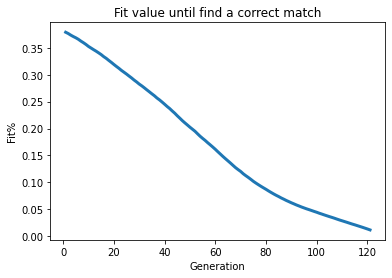

In [90]:
def generate_population(generation, PROTEIN, lenght_chromosome, number_chromosome):
    
    population = createPopulation(lenght_chromosome,number_chromosome)
    weighted_population = []
    correct_generation = 0
    tot_abs = (85 - 65) * len(PROTEIN) * len(population)
    all_sum_fitness = []
    prob_of_mutation = 0

    for G in range(0 , generation):
        weighted_population = []
        sum_fitness = 0
        
        for I in population:
            fit_value = fitness(I)

            if I == PROTEIN:
                exact_population = population
                correct_generation = G
                return(exact_population, correct_generation, all_sum_fitness)
            
            if fit_value != 0:
                pair = (I, 1 / fit_value)
                sum_fitness = sum_fitness +  fit_value
            else:
                pair = (I, 1)

            weighted_population.append(pair)
    
        population = []
        all_sum_fitness.append(sum_fitness / tot_abs)
            
        for _ in range(round(len(weighted_population) / 2)):
            
            prob_of_mutation += 0.1
            
            ind1 = weighted_choice(weighted_population)
            ind2 = weighted_choice(weighted_population)
            
            ind1, ind2 = crossover(ind1, ind2)

            population.append(mutate(ind1,prob_of_mutation))
            population.append(mutate(ind2,prob_of_mutation))

    return(population, correct_generation, all_sum_fitness)

pop, gen, sum_f = generate_population(10000, PROTEIN, len(PROTEIN), 10000)
print(f'the correct generation is: {gen}')

# make data
x = range(1, gen + 1)
y = sum_f

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=3.0)
plt.title('Fit value until find a correct match')
plt.ylabel('Fit%')
plt.xlabel('Generation')
plt.show()

maximum number of Gene differs = 24 over 100


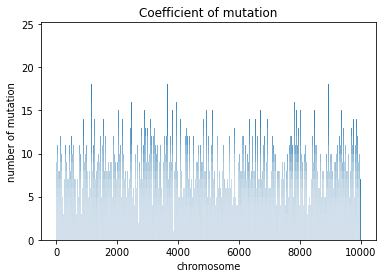

In [91]:
def coefficiente_mutation(population, PROTEIN):
    tot_error = []
    for chromosome in range(len(population)):
        error = 0
        for char in range(len(PROTEIN)):
            if (population[chromosome][char] != PROTEIN[char]):
                error += 1
        tot_error.append(error)
    return tot_error

x = range(0, len(pop))
y = coefficiente_mutation(pop, PROTEIN)
print(f'maximum number of Gene differs = {max(y)} over {len(PROTEIN)}')
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.1)
plt.title('Coefficient of mutation')
plt.ylabel('number of mutation')
plt.xlabel('chromosome')
plt.show()

In [92]:
print(pop)

['GAGACTGCTAGCTAGCTCTAGCTACGGCGCATTAGTTTTTTTGCAAATGCCACCAAAACAAAAACAAAAAAAAAAAAAATCGTAGCTCCGTCGCTAGCTG', 'GAGCATGCTACCTAGCTATCGCTACGGCGCATTAGTTTTTTTGCACATGCACCCCAAAAACCAAAAAAAAAAAAAAAAATCGTAGCTAAGTAGCTACCTG', 'GAGCCTGCTAGATAGCTATCCATAAGGCCCATTCGTTTTTTTGCACATGCCCCCAAGAAAAAAAAAAAAACACAAAAAATCGTAGCTACGTAGCTAGCTG', 'GAGCCTGCTAGCTAGATATCGATCCGGAGCATTAGTTTTTTTGCAAATGCCCCCACAAAAAAAAAAAAAAAAAAAGAAATCGTCGCTCAGTAGCTAGATG', 'GAGCATGCTAGCTAGCTATCGCTACGGAGCCTTAGTTTTTTTGCACATGCCACCAAAAAAAAAACAAAAAAAAAAAAAATCGTAGCTAAGTAGCTAGATG', 'GAGCATGCTAGCTAGATATAGCTCCGGCGCCTTAGTTTTTTTGCACATGCCCCAACAAAAAAAAAAAAAAAAAAAAAACTGGTAGCTACGTAGCTAGATG', 'GAGCCTGCTAGCTAGCTGTCGATACGGCGCATTAGTTTTTTTGCACAUGCCCCCACAAACAAAAAAAAAAAACCAAAAATCGTCGCTACGTAGCTAGCTG', 'GAGCCTGATAGCTAGCTATCGCTACGGCGCATTAGTTTTTTTGCACATGCCCCCAAAAAAACCAAACAAAAACCAAAAATCGTCGCTACGTAGCTAGATG', 'GAGAATCCTCGGTAGATATAGATACGGAGCATTAGTTTTTTTGCACATGCCCCCAAAAAAAAAAAAAAACAAAAAAAACTAGTAGCTACGTAGCTAGCTG', 'GAGCATGCTAGATAGCTATCGCTACGGCGCATTAGTTTTTTTGCCCATGCCCCCAAAAAAAA